In [1]:
import pandas as pd 
import numpy as np

import cognitive_GLVQ as cglvq
import GLVQ as glvq
import optimizer as opt

import matplotlib.pyplot as plt

import random
import copy

In [2]:
num_prototypes = 3
colors = ["#5171fF", "#fF7151", "#519951"]

# Data prep

In [3]:
# Load the data
df = pd.read_csv("dataset/glass.csv")

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
feature = df[df.columns[:-1]]
label = df[df.columns[-1]]

feature = feature.to_numpy()
label = label.to_numpy()
label = label.reshape(-1, 1)

In [5]:
unique, count = np.unique(label, return_counts=True)
sample_number = dict(zip(unique, count))
sample_number

{1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29}

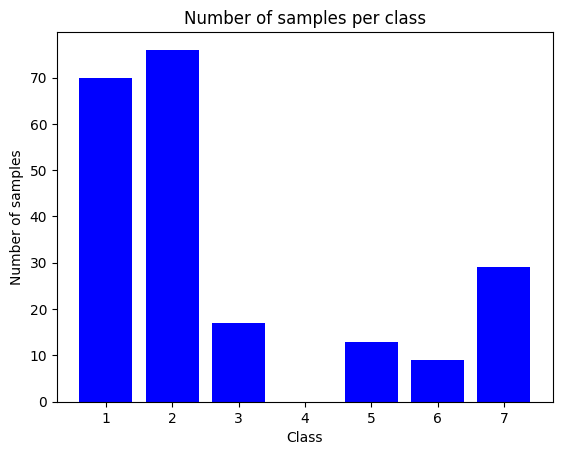

In [6]:
plt.bar(sample_number.keys(), sample_number.values(), color='b')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.show()

## Select prototypes

In [7]:
prototypes_index = []
for class_name in sample_number:
    index_i = np.where(label == class_name)
    index_i = list(index_i[0])
    prototype_index_i = random.sample(index_i, num_prototypes)
    prototypes_index += prototype_index_i
prototypes_index.sort(reverse=True)
prototypes = [(feature[i],label[i]) for i in prototypes_index]
## Remove prototypes from dataset
feature = np.delete(feature, prototypes_index, axis=0)
label = np.delete(label, prototypes_index, axis=0)    


### Accuracy

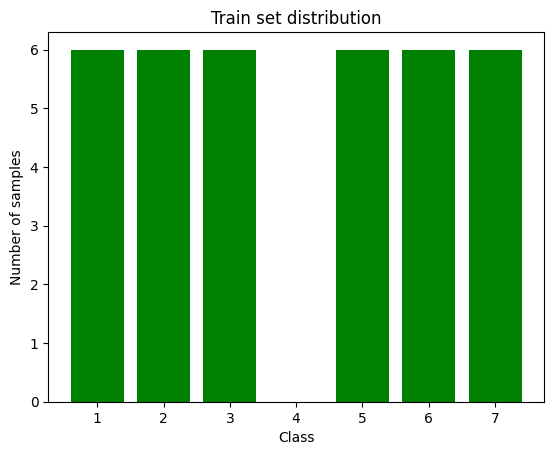

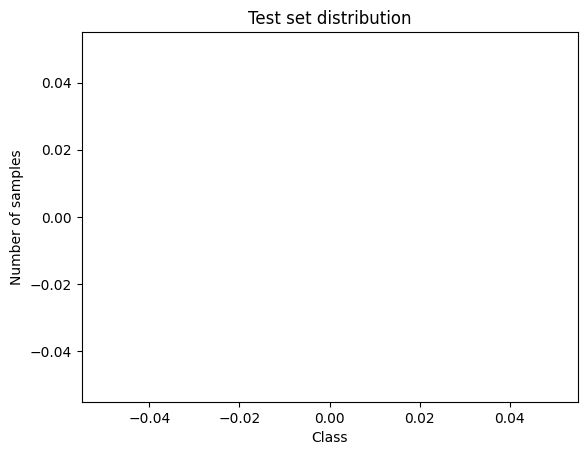

In [8]:
# Select equal amount of normal and abnormal data
data_per_class = min(count) - num_prototypes
test_percentage = 0.15
test_size = int(test_percentage * data_per_class)
train_size = data_per_class - test_size
feature_acc = copy.deepcopy(feature)
label_acc = copy.deepcopy(label)

## Select test set
test_index = []
for class_name in sample_number:
    index_i = np.where(label_acc == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, test_size)
    test_index += index_i_sample
test_index.sort(reverse=True)
test_set_acc = [(feature_acc[i],label_acc[i]) for i in test_index]
random.shuffle(test_set_acc)
unique, counts = np.unique(label_acc[test_index], return_counts=True)
test_dist = dict(zip(unique, counts))
feature_acc = np.delete(feature_acc, test_index, axis=0)
label_acc = np.delete(label_acc, test_index, axis=0)

## Select train set
train_index = []
for class_name in sample_number:
    index_i = np.where(label_acc == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, train_size)
    train_index += index_i_sample
train_index.sort(reverse=True)
unique, counts = np.unique(label_acc[train_index], return_counts=True)
train_dist = dict(zip(unique, counts))
train_set_acc = [(feature_acc[i],label_acc[i]) for i in train_index]
random.shuffle(train_set_acc)

plt.bar(train_dist.keys(), train_dist.values(), color='g')
plt.title('Train set distribution')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

plt.bar(test_dist.keys(), test_dist.values(), color='r')
plt.title('Test set distribution')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

#### Train the Models

In [ ]:
num_epochs = 100

##### GLVQ

##### 1-step lr =0.1

In [ ]:
learning_rate = 0.1
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc, sample_number=train_dist)

In [ ]:
glvq_acc.lr_graph("OGLVQ learning rate")
glvq_acc.acc_graph("OGLVQ accuracy")
glvq_acc.f1_graph("OGLVQ f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.03
glvq_acc = glvq.GLVQ(prototypes,learning_rate,)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc,sample_number=train_dist)

In [ ]:
glvq_acc.lr_graph("OGLVQ learning rate")
glvq_acc.acc_graph("OGLVQ accuracy")
glvq_acc.f1_graph("OGLVQ f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc, sample_number = train_dist)

In [ ]:
glvq_acc.lr_graph("OGLVQ learning rate")
glvq_acc.acc_graph("OGLVQ accuracy")
glvq_acc.f1_graph("OGLVQ f1 score")

##### CP

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability, sample_number = train_dist)

In [ ]:
cp_glvq_acc.lr_graph("CP learning rate")
cp_glvq_acc.acc_graph("CP accuracy")
cp_glvq_acc.f1_graph("CP f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability, sample_number = train_dist)

In [ ]:
cp_glvq_acc.lr_graph("CP learning rate")
cp_glvq_acc.acc_graph("CP accuracy")
cp_glvq_acc.f1_graph("CP f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability, sample_number = train_dist)

In [ ]:
cp_glvq_acc.lr_graph("CP learning rate")
cp_glvq_acc.acc_graph("CP accuracy")
cp_glvq_acc.f1_graph("CP f1 score")

##### DFH

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic, sample_number= train_dist)

In [ ]:
dfh_glvq_acc.lr_graph("DFH learning rate")
dfh_glvq_acc.acc_graph("DFH accuracy")
dfh_glvq_acc.f1_graph("DFH f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic, sample_number = train_dist)

In [ ]:
dfh_glvq_acc.lr_graph("DFH learning rate")
dfh_glvq_acc.acc_graph("DFH accuracy")
dfh_glvq_acc.f1_graph("DFH f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic, sample_number = train_dist)

In [ ]:
dfh_glvq_acc.lr_graph("DFH learning rate")
dfh_glvq_acc.acc_graph("DFH accuracy")
dfh_glvq_acc.f1_graph("DFH f1 score")

##### MS

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
ms_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.middle_symmetry, sample_number=train_dist)

In [ ]:
ms_glvq_acc.lr_graph("MS learning rate")
ms_glvq_acc.acc_graph("MS accuracy")
ms_glvq_acc.f1_graph("MS f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
ms_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.middle_symmetry, sample_number=train_dist)

In [ ]:
ms_glvq_acc.lr_graph("MS learning rate")
ms_glvq_acc.acc_graph("MS accuracy")
ms_glvq_acc.f1_graph("MS f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
ms_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.middle_symmetry, sample_number=train_dist)

In [ ]:
ms_glvq_acc.lr_graph("MS learning rate")
ms_glvq_acc.acc_graph("MS accuracy")
ms_glvq_acc.f1_graph("MS f1 score")

##### LS

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry, sample_number= train_dist)

In [ ]:
ls_glvq_acc.lr_graph("LS learning rate")
ls_glvq_acc.acc_graph("LS accuracy")
ls_glvq_acc.f1_graph("LS f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry, sample_number= train_dist)

In [ ]:
ls_glvq_acc.lr_graph("LS learning rate")
ls_glvq_acc.acc_graph("LS accuracy")
ls_glvq_acc.f1_graph("LS f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry,sample_number = train_dist)

In [ ]:
ls_glvq_acc.lr_graph("LS learning rate")
ls_glvq_acc.acc_graph("LS accuracy")
ls_glvq_acc.f1_graph("LS f1 score")

##### LSR

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity, sample_number = train_dist)

In [ ]:
lsr_glvq_acc.lr_graph("LSR learning rate")
lsr_glvq_acc.acc_graph("LSR accuracy")
lsr_glvq_acc.f1_graph("LSR f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity,sample_number = train_dist)

##### 3-step lr = 0.01

In [ ]:
lsr_glvq_acc.lr_graph("LSR learning rate")
lsr_glvq_acc.acc_graph("LSR accuracy")
lsr_glvq_acc.f1_graph("LSR f1 score")

In [ ]:
learning_rate = 0.01
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity, sample_number = train_dist)

In [ ]:
lsr_glvq_acc.lr_graph("LSR learning rate")
lsr_glvq_acc.acc_graph("LSR accuracy")
lsr_glvq_acc.f1_graph("LSR f1 score")

##### F1 Score

In [ ]:
# Select 20% of #sample-1 as #sample-2
max_data = max(count) - num_prototypes
data_per_class = [int(max_data/10), max_data]
test_percentage = 0.15
test_size = list(map(lambda data: int(data * test_percentage), data_per_class)) 
train_size = [data - test for data, test in zip(data_per_class, test_size)]
feature_f1 = copy.deepcopy(feature)
label_f1 = copy.deepcopy(label)
## Select test set
test_index = []
for j, class_name in enumerate(sample_number):
    index_i = np.where(label_f1 == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, test_size[j])
    test_index += index_i_sample
test_index.sort(reverse=True)
test_set_fscore = [(feature_f1[i],label_f1[i]) for i in test_index]
random.shuffle(test_set_fscore)
unique, counts = np.unique(label_f1[test_index], return_counts=True)
test_dist = dict(zip(unique, counts))
feature_f1 = np.delete(feature_f1, test_index, axis=0)
label_f1 = np.delete(label_f1, test_index, axis=0)

## Select train set
train_index = []
for j, class_name in enumerate(sample_number):
    index_i = np.where(label_f1 == class_name)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, train_size[j])
    train_index += index_i_sample
train_index.sort(reverse=True)
train_set_fscore = [(feature_f1[i],label_f1[i]) for i in train_index]
random.shuffle(train_set_fscore)
unique, counts = np.unique(label_f1[train_index], return_counts=True)
train_dist = dict(zip(unique, counts))

plt.bar(train_dist.keys(), train_dist.values(), color='g')
plt.title('Train set distribution')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

plt.bar(test_dist.keys(), test_dist.values(), color='r')
plt.title('Test set distribution')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

#### Train the Models

In [ ]:
num_epochs = 100

##### GLVQ

##### 1-step lr =0.1

In [ ]:
learning_rate = 0.1
glvq_fscore = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_fscore.train(num_epochs,train_set_fscore,test_set_fscore, sample_number=train_dist)

In [ ]:
glvq_fscore.lr_graph("OGLVQ learning rate")
glvq_fscore.acc_graph("OGLVQ accuracy")
glvq_fscore.f1_graph("OGLVQ f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.03
glvq_fscore = glvq.GLVQ(prototypes,learning_rate,)
hist = glvq_fscore.train(num_epochs,train_set_fscore,test_set_fscore,sample_number=train_dist)

In [ ]:
glvq_fscore.lr_graph("OGLVQ learning rate")
glvq_fscore.acc_graph("OGLVQ accuracy")
glvq_fscore.f1_graph("OGLVQ f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
glvq_fscore = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_fscore.train(num_epochs,train_set_fscore,test_set_fscore, sample_number = train_dist)

In [ ]:
glvq_fscore.lr_graph("OGLVQ learning rate")
glvq_fscore.acc_graph("OGLVQ accuracy")
glvq_fscore.f1_graph("OGLVQ f1 score")

##### CP

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
cp_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.conditional_probability, sample_number = train_dist)

In [ ]:
cp_glvq_fscore.lr_graph("CP learning rate")
cp_glvq_fscore.acc_graph("CP accuracy")
cp_glvq_fscore.f1_graph("CP f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
cp_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.conditional_probability, sample_number = train_dist)

In [ ]:
cp_glvq_fscore.lr_graph("CP learning rate")
cp_glvq_fscore.acc_graph("CP accuracy")
cp_glvq_fscore.f1_graph("CP f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
cp_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.conditional_probability, sample_number = train_dist)

In [ ]:
cp_glvq_fscore.lr_graph("CP learning rate")
cp_glvq_fscore.acc_graph("CP accuracy")
cp_glvq_fscore.f1_graph("CP f1 score")

##### DFH

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
dfh_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.dual_factor_heuristic, sample_number= train_dist)

In [ ]:
dfh_glvq_fscore.lr_graph("DFH learning rate")
dfh_glvq_fscore.acc_graph("DFH accuracy")
dfh_glvq_fscore.f1_graph("DFH f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
dfh_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.dual_factor_heuristic, sample_number = train_dist)

In [ ]:
dfh_glvq_fscore.lr_graph("DFH learning rate")
dfh_glvq_fscore.acc_graph("DFH accuracy")
dfh_glvq_fscore.f1_graph("DFH f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
dfh_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.dual_factor_heuristic, sample_number = train_dist)

In [ ]:
dfh_glvq_fscore.lr_graph("DFH learning rate")
dfh_glvq_fscore.acc_graph("DFH accuracy")
dfh_glvq_fscore.f1_graph("DFH f1 score")

##### MS

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
ms_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.middle_symmetry, sample_number=train_dist)

In [ ]:
ms_glvq_fscore.lr_graph("MS learning rate")
ms_glvq_fscore.acc_graph("MS accuracy")
ms_glvq_fscore.f1_graph("MS f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
ms_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.middle_symmetry, sample_number=train_dist)

In [ ]:
ms_glvq_fscore.lr_graph("MS learning rate")
ms_glvq_fscore.acc_graph("MS accuracy")
ms_glvq_fscore.f1_graph("MS f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
ms_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ms_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.middle_symmetry, sample_number=train_dist)

In [ ]:
ms_glvq_fscore.lr_graph("MS learning rate")
ms_glvq_fscore.acc_graph("MS accuracy")
ms_glvq_fscore.f1_graph("MS f1 score")

##### LS

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
ls_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry, sample_number= train_dist)

In [ ]:
ls_glvq_fscore.lr_graph("LS learning rate")
ls_glvq_fscore.acc_graph("LS accuracy")
ls_glvq_fscore.f1_graph("LS f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
ls_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry, sample_number= train_dist)

In [ ]:
ls_glvq_fscore.lr_graph("LS learning rate")
ls_glvq_fscore.acc_graph("LS accuracy")
ls_glvq_fscore.f1_graph("LS f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
ls_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry,sample_number = train_dist)

In [ ]:
ls_glvq_fscore.lr_graph("LS learning rate")
ls_glvq_fscore.acc_graph("LS accuracy")
ls_glvq_fscore.f1_graph("LS f1 score")

##### LSR

##### 1-step lr = 0.1

In [ ]:
learning_rate = 0.1
lsr_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry_rarity, sample_number = train_dist)

In [ ]:
lsr_glvq_fscore.lr_graph("LSR learning rate")
lsr_glvq_fscore.acc_graph("LSR accuracy")
lsr_glvq_fscore.f1_graph("LSR f1 score")

##### 2-step lr = 0.03

In [ ]:
learning_rate = 0.03
lsr_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry_rarity,sample_number = train_dist)

In [ ]:
lsr_glvq_fscore.lr_graph("LSR learning rate")
lsr_glvq_fscore.acc_graph("LSR accuracy")
lsr_glvq_fscore.f1_graph("LSR f1 score")

##### 3-step lr = 0.01

In [ ]:
learning_rate = 0.01
lsr_glvq_fscore = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_fscore.train(num_epochs,train_set_fscore, test_set_fscore, opt.loose_symmetry_rarity, sample_number = train_dist)

In [ ]:
lsr_glvq_fscore.lr_graph("LSR learning rate")
lsr_glvq_fscore.acc_graph("LSR accuracy")
lsr_glvq_fscore.f1_graph("LSR f1 score")